In [15]:
# run this if you want static figures
%matplotlib inline

In [16]:
# run this if you want interactive figures
%matplotlib notebook

In [17]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


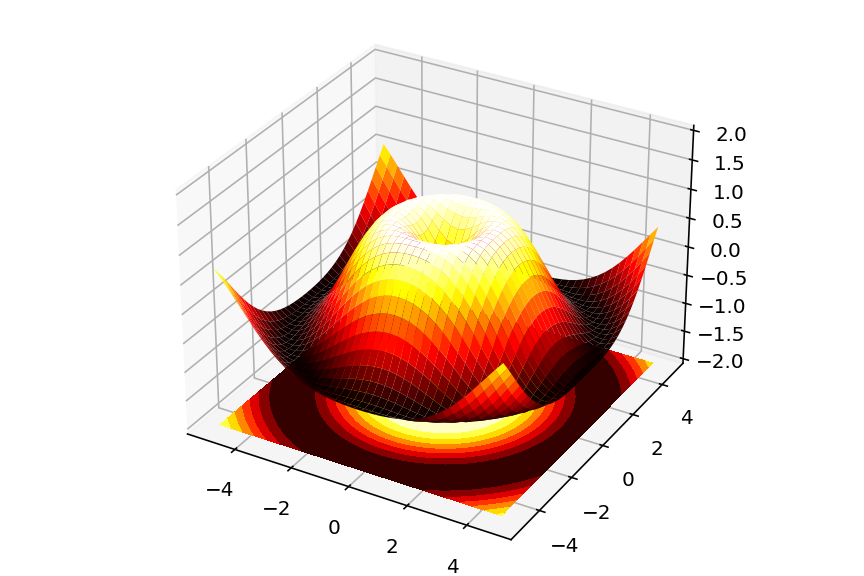

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(x, y, z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)
plt.show()

<IPython.core.display.Javascript object>


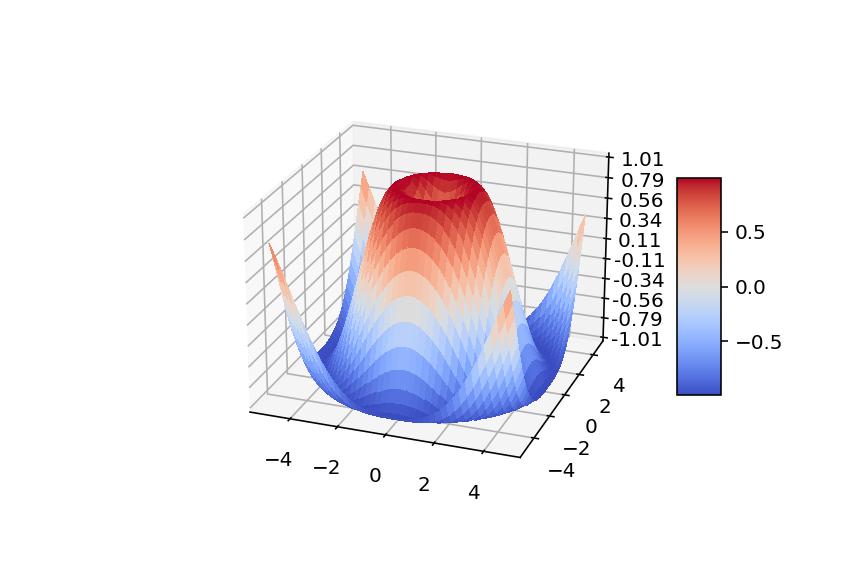

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


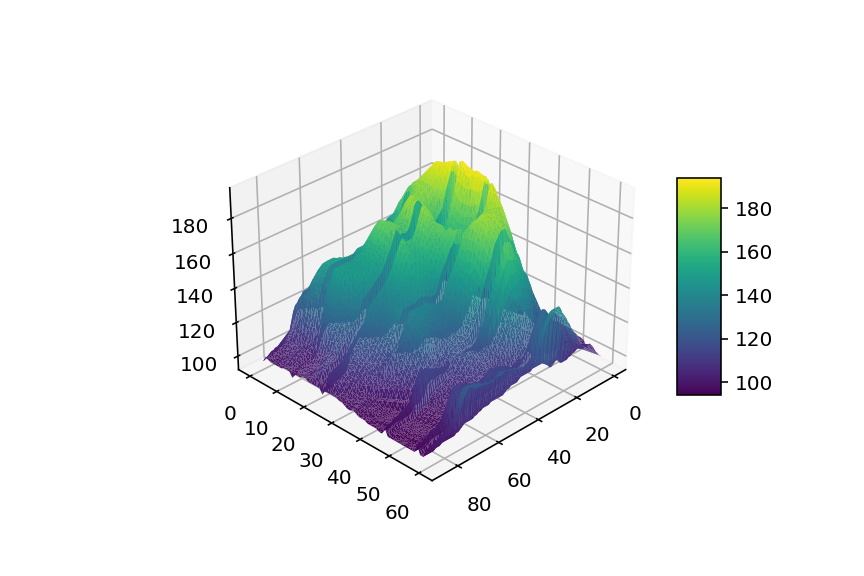

<IPython.core.display.Javascript object>


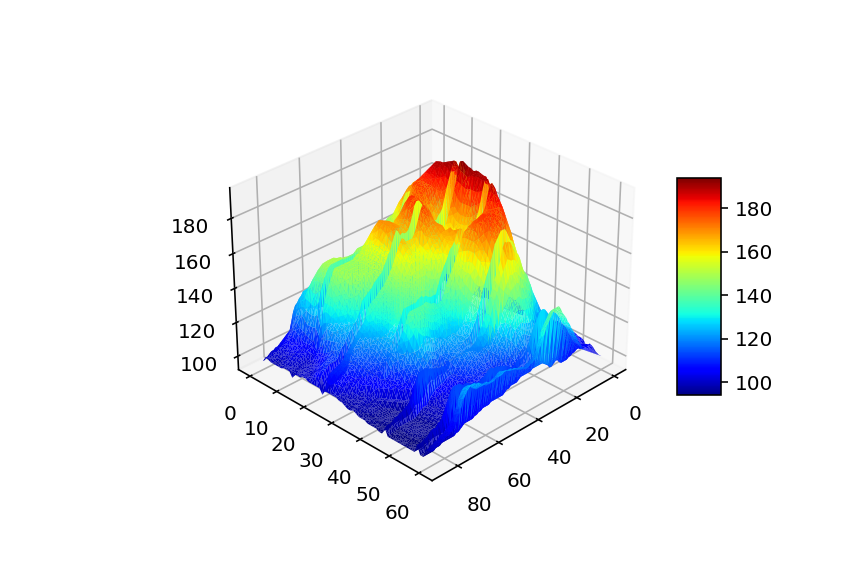

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf1 = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
# Rotate it
ax.view_init(30, 45)

# Add a color bar which maps values to colors.
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.show()

# Other palette
fig = plt.figure()
ax = fig.gca(projection='3d')
surf2 = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)

# Rotate it
ax.view_init(30, 45)

# Add a color bar which maps values to colors.
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>


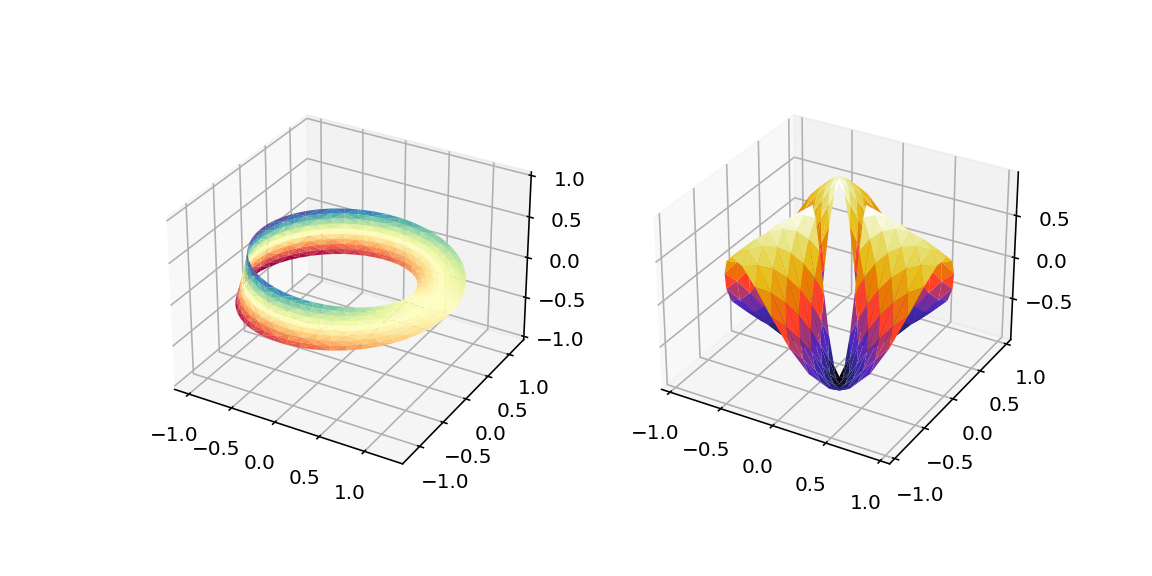

In [21]:
# Example from https://matplotlib.org/gallery/mplot3d/trisurf3d_2.py

"""
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a Triangulation object's mask and passes the object directly
to plot_trisurf.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)

plt.show()